# Laboratory 2: ML Preliminaries Part 1

by Kristoffer Dave A. Tabong

In [16]:
### Import your libraries here. Don't use sklearn and other ML models.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1:

Make a function, `confusion_matrix,` which will return an NxN array given a list of `y_actual` and `y_predicted` values. The rows represent the predicted values while the columns represent the actual values.

In [17]:
def confusion_matrix(y_actual, y_predicted):
    labels = np.unique(np.concatenate((y_actual, y_predicted)))
    n = len(labels)
    matrix = np.zeros((n, n), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}

    for actual, predicted in zip(y_actual, y_predicted):
        matrix[label_to_index[predicted], label_to_index[actual]] += 1

    return matrix

In [18]:
#ASSERT TEST. DO NOT DELETE
y_actual    = [0, 1, 2, 0, 1, 2]
y_predicted = [0, 2, 1, 0, 0, 1]
conf_matrix = np.array([
        [2, 1, 0],
        [0, 0, 2],
        [0, 1, 0]])
np.testing.assert_array_equal(confusion_matrix(y_actual, y_predicted), conf_matrix)

### Question 2:

Make a function, `accuracy,` which will return the model's accuracy, given the `confusion matrix` array.

In [19]:
def accuracy(array):
    correct_predictions = np.trace(array)
    total_samples = np.sum(array)
    if total_samples == 0:
        return 0.0
    
    return correct_predictions / total_samples

In [20]:
#ASSERT TEST. DO NOT DELETE
conf_matrix = np.array([
        [2, 1, 0],
        [0, 0, 2],
        [0, 1, 0]])

np.testing.assert_allclose(accuracy(conf_matrix), 0.3333, rtol=1e-3)

### Question 3:

Make a function, `precision_per_class,` which will return the precision value for each class.

In [21]:
def precision_per_class(conf_matrix):
    true_positives = np.diag(conf_matrix)
    false_positives = np.sum(conf_matrix, axis=1) - true_positives
    
    precision = np.divide(true_positives, true_positives + false_positives,
                          out=np.zeros_like(true_positives, dtype=float),
                          where=(true_positives + false_positives) != 0)
    
    return precision

In [22]:
#ASSERT TEST. DO NOT DELETE
conf_matrix = np.array([
        [10,  2,  3],
        [ 4, 20,  1],
        [ 0,  3, 15]])

np.testing.assert_allclose(precision_per_class(conf_matrix), [0.6667, 0.8, 0.833], rtol=1e-2)

### Question 4:

Make a function, `recall_per_class,` which will return the precision value for each class.

In [23]:
def recall_per_class(conf_matrix):
    # Extract true positives (diagonal elements)
    true_positives = np.diag(conf_matrix)
    false_negatives = np.sum(conf_matrix, axis=0) - true_positives
    
    # Compute recall for each class
    recall = np.divide(true_positives, true_positives + false_negatives, 
                         out=np.zeros_like(true_positives, dtype=float), 
                         where=(true_positives + false_negatives) != 0)
    
    return recall

In [24]:
#ASSERT TEST. DO NOT DELETE
conf_matrix = np.array([
        [10,  2,  3],
        [ 4, 20,  1],
        [ 0,  3, 15]])

np.testing.assert_allclose(recall_per_class(conf_matrix), [0.714, 0.8, 0.789], rtol=1e-2)

### Question 5:

Make a function, `macro_precision,` which will return the precision value of the model using macro averaging. Use the `precision_per_class` function.

In [25]:
def macro_precision(conf_matrix):
    precisions = precision_per_class(conf_matrix)
    return np.mean(precisions)

In [26]:
#ASSERT TEST. DO NOT DELETE
conf_matrix = np.array([
        [10,  2,  3],
        [ 4, 20,  1],
        [ 0,  3, 15]])

np.testing.assert_allclose(macro_precision(conf_matrix), 0.766, rtol=1e-2)

### Question 6:

Make a function, `macro_recall,` which will return the recall value of the model using macro averaging. Use the `recall_per_class` function.

In [27]:
def macro_recall(conf_matrix):
    per_class_recalls = recall_per_class(conf_matrix)
    return np.mean(per_class_recalls)

In [28]:
#ASSERT TEST. DO NOT DELETE
conf_matrix = np.array([
        [10,  2,  3],
        [ 4, 20,  1],
        [ 0,  3, 15]])

np.testing.assert_allclose(macro_recall(conf_matrix), 0.766, rtol=1e-2)

### Question 7:

Make a function, `macro_f1score,` which will return the f1score value of the model using macro averaging. Use the `macro_recall` and `macro_precision` in the function.

In [29]:
#ASSERT TEST. DO NOT DELETE
def macro_f1score(conf_matrix):
    precision = macro_precision(conf_matrix)
    recall = macro_recall(conf_matrix)
    # Check to avoid division by zero
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)


In [30]:
conf_matrix = np.array([
        [10,  2,  3],
        [ 4, 20,  1],
        [ 0,  3, 15]])

np.testing.assert_allclose(macro_f1score(conf_matrix), 0.766, rtol=1e-2)

### Question 8:

Make a function `label_binarize` that converts a `true_labels` list into a (n_sample, n_class) binary matrix. Given also the list of `classes`

In [31]:
def label_binarize(true_labels, classes):
    n_samples = len(true_labels)
    n_classes = len(classes)
    binarized = np.zeros((n_samples, n_classes), dtype=int)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    
    # Set the corresponding index to 1 for each label in true_labels
    for i, label in enumerate(true_labels):
        if label in class_to_index:
            binarized[i, class_to_index[label]] = 1
    
    return binarized

In [32]:
#ASSERT TEST. DO NOT DELETE
true_labels = np.array([1, 2, 1, 3])
classes = [1, 2, 3, 4]

expected = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0], 
        [1, 0, 0, 0], 
        [0, 0, 1, 0]   
    ])
np.testing.assert_array_equal(label_binarize(true_labels, classes), expected)

### Question 9

Make a function `compute_roc_curve` that generates the coordinates of False Positive Rate, `fpr` and True Positive Rate, `tpr` arrays given the `y_actual` values and the `probabilities` of the positive class.

In [33]:
def compute_roc_curve(y_actual, probabilities):
    y_actual = np.array(y_actual)
    probabilities = np.array(probabilities)
    P = np.sum(y_actual == 1)
    N = np.sum(y_actual == 0)
    
    thresholds = np.sort(np.unique(probabilities))[::-1]
    tpr_curve = []
    fpr_curve = []
    
    tpr_curve.append(0.0)
    fpr_curve.append(0.0)
    
    # Sweep through each threshold
    for thresh in thresholds:
        # Predict positive if probability >= threshold
        y_pred = (probabilities >= thresh).astype(int)
        TP = np.sum((y_actual == 1) & (y_pred == 1))
        FP = np.sum((y_actual == 0) & (y_pred == 1))
        tpr = TP / P if P > 0 else 0.0
        fpr = FP / N if N > 0 else 0.0
        tpr_curve.append(tpr)
        fpr_curve.append(fpr)
    
    # End with a threshold below the minimum probability: all samples predicted positive
    y_pred = np.ones_like(probabilities)
    TP = np.sum((y_actual == 1) & (y_pred == 1))
    FP = np.sum((y_actual == 0) & (y_pred == 1))
    tpr = TP / P if P > 0 else 0.0
    fpr = FP / N if N > 0 else 0.0
    tpr_curve.append(tpr)
    fpr_curve.append(fpr)
    
    return np.array(fpr_curve), np.array(tpr_curve)

In [34]:
#ASSERT TEST. DON'T DELETE OR MODIFY
y_true = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
expected_fpr = np.array([0, 0, 0.5, 0.5, 1.0, 1.0])
expected_tpr = np.array([0, 0.5, 0.5, 1.0, 1.0, 1.0])

computed_fpr, computed_tpr = compute_roc_curve(y_true, scores)
np.testing.assert_allclose(computed_fpr, expected_fpr, rtol=1e-5)
np.testing.assert_allclose(computed_tpr, expected_tpr, rtol=1e-5)

### Question 10

    Compute for the AUC using trapezoidal rule given the list of `fpr` and `tpr` coordinates

In [35]:
def compute_auc(fpr, tpr):
    fpr = np.array(fpr)
    tpr = np.array(tpr)
    
    sorted_indices = np.argsort(fpr)
    fpr_sorted = fpr[sorted_indices]
    tpr_sorted = tpr[sorted_indices]
    
    # Compute AUC using the trapezoidal rule
    auc = np.trapz(tpr_sorted, fpr_sorted)
    return auc

In [36]:
#ASSERT. DONT DELETE
expected_fpr = np.array([0, 0, 0.5, 0.5, 1.0, 1.0])
expected_tpr = np.array([0, 0.5, 0.5, 1.0, 1.0, 1.0])
auc_value = compute_auc(expected_fpr, expected_tpr)
np.testing.assert_almost_equal(auc_value, 0.75, decimal=5)

C:\Users\althe\AppData\Local\Temp\ipykernel_15728\2320781792.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr_sorted, fpr_sorted)


### Question 11

Make a function plot_auc_roc that will plot the ROC of each class given the following inputs:
- (n_samples, n_classes): the array that specifies the probability of prediction per class
- y_acutal: the actual labels of the samples
- classes: list of the class labels

The AUC (Area Under Curve) should be visible in the graph. Apply the function created on Question 8-10.

**NOTE: DON'T USE SKLEARN. USE ONLY PYTHON NATIVE MODULES, NUMPY, and MATPLOTLIB**

In [37]:
def plot_auc_roc(probabilities, true_labels, classes, title="Multiclass ROC Curve"):
    # Step 1: Binarize the true labels into a (n_samples, n_classes) binary matrix.
    y_bin = label_binarize(true_labels, classes)
    
    roc_auc = {}

    plt.figure(figsize=(8, 6))
    
    # Step 2 & 3: For each class, compute the ROC curve (FPR, TPR) and AUC.
    for i, cls in enumerate(classes):
        # For class i, get the binary true labels and predicted probabilities.
        y_true_class = y_bin[:, i]
        prob_class = probabilities[:, i]
        
        # Compute ROC curve
        fpr, tpr = compute_roc_curve(y_true_class, prob_class)
        
        # Compute AUC using the trapezoidal rule
        auc = compute_auc(fpr, tpr)
        roc_auc[cls] = auc
        
        # Step 4: Plot the ROC
        plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC = {auc:.2f})")
    
    # Micro-average ROC curve
    y_micro = y_bin.ravel()
    prob_micro = probabilities.ravel()
    fpr_micro, tpr_micro = compute_roc_curve(y_micro, prob_micro)
    auc_micro = compute_auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, lw=2, color='#FF1493', linestyle='--', 
             label=f"Micro-average (AUC = {auc_micro:.2f})")
    
    # Plot a diagonal line for random guessing.
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
    
    # Step 5: plot.
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    return roc_auc

C:\Users\althe\AppData\Local\Temp\ipykernel_15728\2320781792.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tpr_sorted, fpr_sorted)


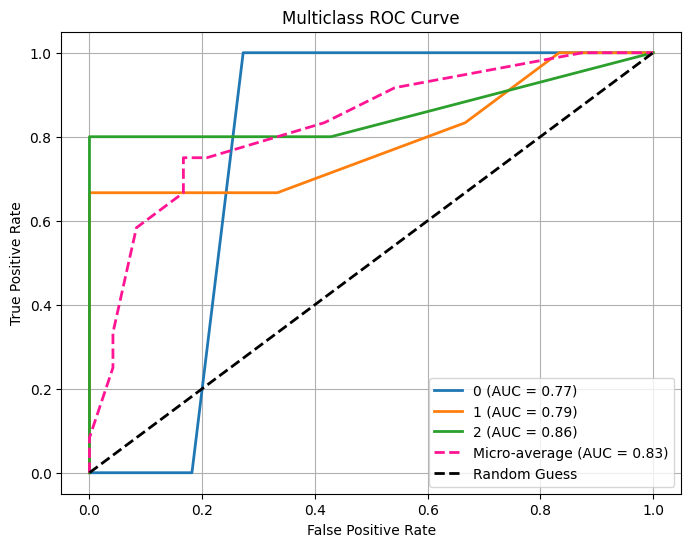

{0: np.float64(0.7727272727272727),
 1: np.float64(0.7916666666666666),
 2: np.float64(0.8571428571428571)}

In [38]:
#ASSERT
classes = [0, 1, 2]
true_labels = np.array([1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0])
probabilities = np.array([
    [0.05, 0.85, 0.10],  
    [0.10, 0.20, 0.70],  
    [0.60, 0.20, 0.20], 
    [0.15, 0.75, 0.10],  
    [0.05, 0.25, 0.70], 
    [0.05, 0.15, 0.80],  
    [0.80, 0.10, 0.10], 
    [0.10, 0.80, 0.10],
    [0.70, 0.15, 0.15], 
    [0.10, 0.60, 0.30], 
    [0.20, 0.70, 0.10], 
    [0.60, 0.20, 0.20]  
])
plot_auc_roc(probabilities, true_labels, classes)